# 01 — Experience Study (Mortality A/E)
Load synthetic data and compute A/E by age.

In [1]:
from pathlib import Path
import importlib.util

# Find the project root by walking up until we see src/experience.py
here = Path.cwd()
candidates = [here, here.parent, here.parent.parent]
PROJECT_ROOT = None
for p in candidates:
    if (p / "src" / "experience.py").exists():
        PROJECT_ROOT = p
        break
if PROJECT_ROOT is None:
    raise FileNotFoundError("Couldn't find src/experience.py. Tell me what `ls` shows at your notebook location.")

# Import src/experience.py without touching sys.path
exp_path = PROJECT_ROOT / "src" / "experience.py"
spec = importlib.util.spec_from_file_location("experience", exp_path)
experience = importlib.util.module_from_spec(spec)
spec.loader.exec_module(experience)

DATA_DIR = PROJECT_ROOT / "data" / "raw"
print("Project root:", PROJECT_ROOT)
print("Data dir ok?", DATA_DIR.exists())


Project root: C:\Users\sadil\Documents\life-exp-study-pricing
Data dir ok? True


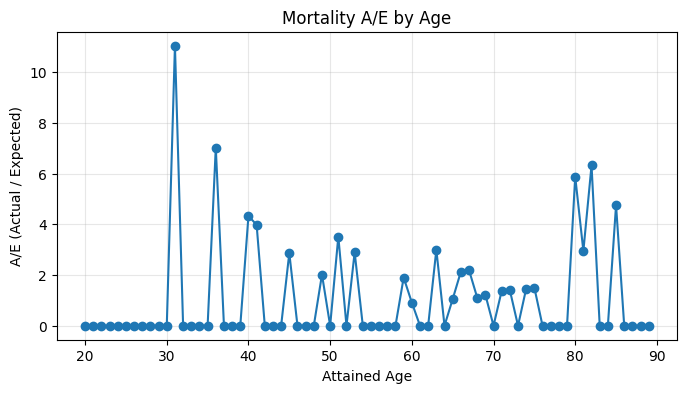

Saved figure to: C:\Users\sadil\Documents\life-exp-study-pricing\reports\figs\ae_by_age.png


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pol  = pd.read_csv(DATA_DIR / "policies.csv")
mort = pd.read_csv(DATA_DIR / "mortality_table.csv")

expos = experience.expand_exposure_years(pol)
ae_by_age = experience.actual_expected(expos, mort, ['attained_age'])

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(ae_by_age['attained_age'], ae_by_age['AE'], marker='o')
ax.set_xlabel("Attained Age")
ax.set_ylabel("A/E (Actual / Expected)")
ax.set_title("Mortality A/E by Age")
ax.grid(True, alpha=0.3)

out_png = PROJECT_ROOT / "reports" / "figs" / "ae_by_age.png"
out_png.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(out_png, dpi=200, bbox_inches="tight")
plt.show()

print("Saved figure to:", out_png)


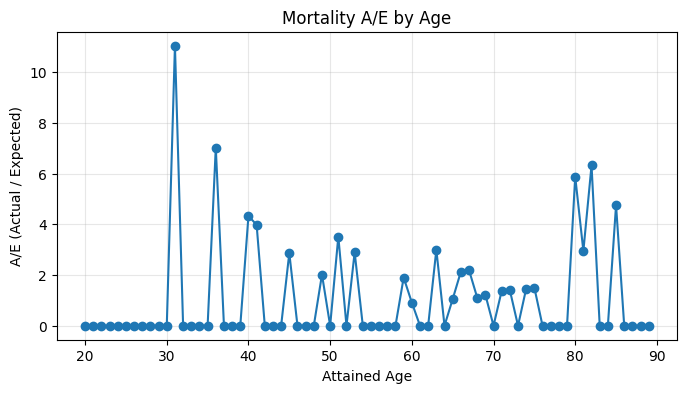

Saved: ..\reports\figs\ae_by_age_v2.png


In [3]:
# assumes ae_by_age is already built and the plot shows inline above
import matplotlib.pyplot as plt
from pathlib import Path

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(ae_by_age['attained_age'], ae_by_age['AE'], marker='o')
ax.set_xlabel("Attained Age"); ax.set_ylabel("A/E (Actual / Expected)")
ax.set_title("Mortality A/E by Age"); ax.grid(True, alpha=0.3)

out_png = Path("../reports/figs/ae_by_age_v2.png")   # NEW NAME
fig.canvas.draw()                                     # ensure canvas is drawn
plt.savefig(out_png, dpi=200, bbox_inches="tight")
plt.show(); plt.close(fig)

print("Saved:", out_png)
